<a href="https://colab.research.google.com/github/Vaishnavi-cyber-blip/stock-price/blob/main/StockPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [ ]:
key = '43210fb49481145203f782ffa978dcaeb618e051'
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
df = pd.read_csv('AAPL.csv')
df1 = df.reset_index()['adjClose']

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00148542]
 [0.00393385]
 [0.00514872]
 ...
 [0.96662347]
 [0.97190609]
 [0.97366696]]


In [ ]:
training_size=int(len(df1)*0.67)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 285ms/step - loss: 0.0063 - val_loss: 0.1562
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0016 - val_loss: 0.0493
Epoch 3/100
12/12 [==============================] - 2s 185ms/step - loss: 7.5204e-04 - val_loss: 0.0142
Epoch 4/100
12/12 [==============================] - 2s 182ms/step - loss: 3.2980e-04 - val_loss: 0.0025
Epoch 5/100
12/12 [==============================] - 2s 195ms/step - loss: 3.0766e-04 - val_loss: 0.0025
Epoch 6/100
12/12 [==============================] - 2s 185ms/step - loss: 2.7404e-04 - val_loss: 0.0030
Epoch 7/100
12/12 [==============================] - 2s 194ms/step - loss: 2.5578e-04 - val_loss: 0.0023
Epoch 8/100
12/12 [==============================] - 2s 186ms/step - loss: 2.4396e-04 - val_loss: 0.0035
Epoch 9/100
12/12 [==============================] - 2s 183ms/step - loss: 2.2680e-04 - val_loss: 0.0039
Epoch 10/100
12/12 [==============================] - 2s 196ms/

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

44.1638198226284

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

119.18831658437351

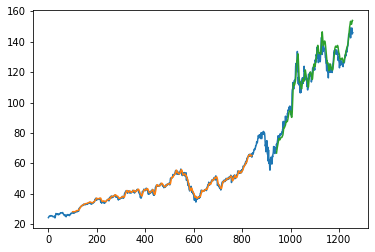

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
accuracy = model.evaluate(X_test,ytest)
print(accuracy)

10/10 [==============================] - 0s 34ms/step - loss: 0.0012
0.0012427340261638165
